# Analyzing Financial Statements II

We analyze this [dataset](https://www.sec.gov/dera/data/financial-statement-and-notes-data-set.html). 

Here, we compare companies using key figures from the financial statements. We compare:
* [Apple](http://investor.apple.com/).
* [Microsoft](https://www.microsoft.com/en-us/investor)
* [Facebook](https://investor.fb.com/home/default.aspx)

## Setup

Some initialization to make life easier. **Make sure to run the following cell before proceeding.**

In [1]:
#Allow multiple outputs for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#Show simple plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

We use the following libraries:
* [Pandas](https://pandas.pydata.org) is the most important workhorse in data analytics.
* [Altair](https://altair-viz.github.io) is a visualization library.

In [2]:
import pandas as pd
import altair as alt
from altair import *
import numpy as np
#Show up to 500 rows
pd.set_option('display.max_rows', 500)
#Format number without four decimals
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#Show altair plots in the notebook
alt.renderers.enable('notebook')

## Apple

The `SUB` file contains the individual filings that have been **sub**mitted to the SEC.

In [3]:
sub_ap = pd.read_csv('https://raw.githubusercontent.com/mschermann/forensic_accounting/master/apple_sub.csv')

In [4]:
sub_ap = sub_ap.loc[:,['adsh', 'cik', 'name', 'sic', 'fye', 'form', 'period', 'fy', 'fp', 'fs_year', 'fs_quarter']]

In [5]:
sub_ap = sub_ap[sub_ap['form'].isin(['10-Q','10-K'])]

In [6]:
len(sub_ap)

33

The `NUM` file contains "includes one row for each distinct amount from each submission
included in the SUB data set." (Source: [SEC](https://www.sec.gov/files/aqfsn_1.pdf))

In [7]:
num_ap = pd.read_csv('https://raw.githubusercontent.com/mschermann/forensic_accounting/master/apple_num.csv')

In [8]:
num_ap = num_ap[num_ap['adsh'].isin(sub_ap['adsh'])]

Apple's financial years ends on September, 30 ([Apple](https://www.apple.com/newsroom/2017/11/apple-reports-fourth-quarter-results/)). This means that:
* Q1 - October, 1 to December, 31.
* Q2 - January, 1 to March, 31.
* Q3 - April, 1 to June, 30.
* Q4 - July, 1 to September, 30.

In [9]:
num_ap = pd.merge(num_ap, sub_ap[['adsh', 'period']], how='left', on='adsh')

We add the financial quarter information.

In [10]:
num_ap['fin_quarter'] = pd.PeriodIndex(num_ap['ddate'], freq='Q-SEP')

In [11]:
num_ap.head()

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote,fs_year,fs_quarter,period,fin_quarter
0,0001193125-14-277160,AccountsPayableCurrent,us-gaap/2014,nan,20130930,0,USD,22367000000.0000,NaN,2014,3,20140630,2013Q4
1,0001193125-14-277160,AccountsPayableCurrent,us-gaap/2014,nan,20140630,0,USD,20535000000.0000,NaN,2014,3,20140630,2014Q3
2,0001193125-14-277160,AccountsReceivableNetCurrent,us-gaap/2014,nan,20130930,0,USD,13102000000.0000,NaN,2014,3,20140630,2013Q4
3,0001193125-14-277160,AccountsReceivableNetCurrent,us-gaap/2014,nan,20140630,0,USD,10788000000.0000,NaN,2014,3,20140630,2014Q3
4,0001193125-14-277160,AccruedLiabilitiesCurrent,us-gaap/2014,nan,20130930,0,USD,13856000000.0000,NaN,2014,3,20140630,2013Q4


## Microsoft

The `SUB` file contains the individual filings that have been **sub**mitted to the SEC.

In [12]:
sub_ms = pd.read_csv('https://raw.githubusercontent.com/mschermann/forensic_accounting/master/msft_sub.csv')

In [13]:
sub_ms = sub_ms.loc[:,['adsh', 'cik', 'name', 'sic', 'fye', 'form', 'period', 'fy', 'fp', 'fs_year', 'fs_quarter']]

Microsoft has published for its financial quarter Q2 of 2012 a `10-Q/A` form. We need to include this.

In [14]:
sub_ms = sub_ms[sub_ms['form'].isin(['10-Q','10-K', '10-Q/A'])]

In [15]:
len(sub_ms)

33

The `NUM` file contains "includes one row for each distinct amount from each submission
included in the SUB data set." (Source: [SEC](https://www.sec.gov/files/aqfsn_1.pdf))

In [16]:
num_ms = pd.read_csv('https://raw.githubusercontent.com/mschermann/forensic_accounting/master/msft_num.csv')

In [17]:
num_ms = num_ms[num_ms['adsh'].isin(sub_ms['adsh'])]

Microsoft's financial years ends on June, 30. This means that:
* Q1 - July, 1 to September, 30.
* Q2 - October, 1 to December, 31.
* Q3 - January, 1 to March, 31.
* Q4 - April, 1 to June, 30.

We get the reporting period from the SUB.

In [18]:
num_ms = pd.merge(num_ms, sub_ms[['adsh', 'period']], how='left', on='adsh')

We add the financial quarter information.

In [19]:
num_ms['fin_quarter'] = pd.PeriodIndex(num_ms['ddate'], freq='Q-JUN')

In [20]:
num_ms.head()

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote,fs_year,fs_quarter,period,fin_quarter
0,0001193125-14-289961,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,nan,20120630,0,USD,1422000000.0000,NaN,2014,3,20140630,2012Q4
1,0001193125-14-289961,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,nan,20130630,0,USD,1743000000.0000,NaN,2014,3,20140630,2013Q4
2,0001193125-14-289961,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,nan,20140630,0,USD,3708000000.0000,NaN,2014,3,20140630,2014Q4
3,0001193125-14-289961,Assets,us-gaap/2013,nan,20130630,0,USD,142431000000.0000,NaN,2014,3,20140630,2013Q4
4,0001193125-14-289961,Assets,us-gaap/2013,nan,20140630,0,USD,172384000000.0000,NaN,2014,3,20140630,2014Q4


## Facebook

The `SUB` file contains the individual filings that have been **sub**mitted to the SEC.

In [21]:
sub_fb = pd.read_csv('https://raw.githubusercontent.com/mschermann/forensic_accounting/master/fb_sub.csv')

In [22]:
sub_fb = sub_fb.loc[:,['adsh', 'cik', 'name', 'sic', 'fye', 'form', 'period', 'fy', 'fp', 'fs_year', 'fs_quarter']]

In [23]:
sub_fb = sub_fb[sub_fb['form'].isin(['10-Q','10-K'])]

In [24]:
len(sub_fb)

23

The `NUM` file contains "includes one row for each distinct amount from each submission
included in the SUB data set." (Source: [SEC](https://www.sec.gov/files/aqfsn_1.pdf))

In [25]:
num_fb = pd.read_csv('https://raw.githubusercontent.com/mschermann/forensic_accounting/master/fb_num.csv')

In [26]:
num_fb = num_fb[num_fb['adsh'].isin(sub_fb['adsh'])]

Facebook's financial years ends on December, 31. This means that:
* Q1- January, 1 to March, 31.
* Q2 - April, 1 to June, 30.
* Q3 - July, 1 to September, 30.
* Q4 - October, 1 to December, 31.

We get the reporting period from the SUB.

In [27]:
num_fb = pd.merge(num_fb, sub_fb[['adsh', 'period']], how='left', on='adsh')

We add the financial quarter information.

In [28]:
num_fb['fin_quarter'] = pd.PeriodIndex(num_fb['ddate'], freq='Q-DEC')

In [29]:
num_fb.head()

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote,fs_year,fs_quarter,period,fin_quarter
0,0001326801-14-000032,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,nan,20131231,0,USD,14000000.0000,NaN,2014,3,20140630,2013Q4
1,0001326801-14-000032,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,nan,20140630,0,USD,-5000000.0000,NaN,2014,3,20140630,2014Q2
2,0001326801-14-000032,Assets,us-gaap/2013,nan,20131231,0,USD,17895000000.0000,NaN,2014,3,20140630,2013Q4
3,0001326801-14-000032,Assets,us-gaap/2013,nan,20140630,0,USD,20769000000.0000,NaN,2014,3,20140630,2014Q2
4,0001326801-14-000032,CommonStockParOrStatedValuePerShare,us-gaap/2013,nan,20131231,0,USD,0.0000,NaN,2014,3,20140630,2013Q4


## Analysis

We need to filter the comparison values. A financial statement typically contains a comparison period to shows the performance of the company. Since we analyze multiple periods, we do not need the comparison values.

In [30]:
num_ap = num_ap[num_ap['ddate']==num_ap['period']]
num_ms = num_ms[num_ms['ddate']==num_ms['period']]
num_fb = num_fb[num_fb['ddate']==num_fb['period']]

We want to use the financial quarter on the x-Axis of our visualizations. However, currently, `fin_quarter` is a TimePeriod object, which cannot be used for this purpose. Thus, we have to transform it into a string.

In [31]:
num_ap['fin_quarter_viz'] = num_ap['fin_quarter'].dt.strftime('%F-Q%q')
num_ms['fin_quarter_viz'] = num_ms['fin_quarter'].dt.strftime('%F-Q%q')
num_fb['fin_quarter_viz'] = num_fb['fin_quarter'].dt.strftime('%F-Q%q')

It is important to understand that elements in the financial statement represents a value at given point in time. This is represented by the field `qtrs`. A `0` means that it is a value for a given point in time. Any value larger than `0` refers to the number of quarters. The sales revenue refers to a quarter. Thus, we have to filter for the quarterly value (`qtrs` = `1`)

## Gross Profit Margin

We calculate the quarterly [gross profit margin](https://en.wikipedia.org/wiki/Gross_margin) as follows:
\begin{equation*}
Quarterly \ Gross \ Profit \ Margin = \frac{(Quarterly \ Sales \ Revenue - Quarterly \ Cost \ of \ Goods \ Sold)}{Quarterly \ Sales \ Revenue}
\end{equation*}

All three companies have different business models and will thus report revenues and sales slightly different:
* The latest financial statement from Apple in the dataset is [here](https://www.sec.gov/Archives/edgar/data/320193/000032019318000007/a10-qq1201812302017.htm#s4529F16351385620912BDEFE85B7EB71).
* The latest financial statement from Microsoft in the dataset is [here](https://www.sec.gov/Archives/edgar/data/789019/000156459018001129/msft-10q_20171231.htm#INCOME_STATEMENTS).
* The latest financial statement from Facebook in the dataset is [here](https://www.sec.gov/Archives/edgar/data/1326801/000132680118000032/fb-03312018x10q.htm#s627D0E15307D56CB957478A0192B894D).

### Obtain the Quarterly Sales Revenue

In [32]:
sales_ap = num_ap[(num_ap['tag'].str.contains('SalesRevenueNet')) & (num_ap['qtrs']==1)].copy()
sales_ms = num_ms[((num_ms['tag'].str.contains('SalesRevenueNet')|(num_ms['tag'].str.contains('Revenues'))))\
                   & (num_ms['qtrs']==1)].copy()
sales_fb = num_fb[(num_fb['tag'].str.contains('Revenues')) & (num_fb['qtrs']==1)].copy()

### Adjustment for Shift in Microsoft's Financial Year

Because of the shift in Microsoft's financial year, we are missing the quarter `Q1` of 2010. However, the dataset provides the cumulative revenues for `Q1` and `Q2`. Thus, we replace the values.

In [33]:
sales_ms.drop(sales_ms[sales_ms['adsh'] == '0001193125-10-015598'].index, inplace=True)

In [34]:
sales_ms = sales_ms.append(num_ms[(num_ms['tag'].str.contains('Revenues')) & \
       (num_ms['adsh'] == '0001193125-10-015598') & \
       (num_ms['qtrs']==2)].copy())

### Obtain the Cost of Goods Sold

In [35]:
cogs_ap = num_ap[(num_ap['tag'].str.contains('CostOfGoodsAndServicesSold')) & (num_ap['qtrs']==1)].copy()
cogs_ms = num_ms[(num_ms['tag'].str.contains('CostOfRevenue')) & (num_ms['qtrs']==1)].copy()
cogs_fb = num_fb[(num_fb['tag'].str.contains('CostOfRevenue')) & (num_fb['qtrs']==1)].copy()

### Adjustment for Shift in Microsoft's Financial Year

In [36]:
cogs_ms.drop(cogs_ms[cogs_ms['adsh'] == '0001193125-10-015598'].index, inplace=True)

In [37]:
cogs_ms = cogs_ms.append(num_ms[(num_ms['tag'].str.contains('CostOfRevenue')) & \
       (num_ms['adsh'] == '0001193125-10-015598') & \
       (num_ms['qtrs']==2)].copy())

### Adjustment for Apple's Fourth Quarter Reports

Apple reports a consolidated figure of its `CostOfGoodsAndServicesSold`. This figure includes also the `CostOfGoodsAndServicesSold` from the previous quarters. We have to adjust this figure and than include it in our data set.

In [38]:
ap_q4 = num_ap[(num_ap['tag'].str.contains('CostOfGoodsAndServicesSold')) & (num_ap['qtrs']==4)].copy()
ap_q4['fin_year'] = ap_q4['fin_quarter_viz'].str[0:4]
ap_q4 = ap_q4.sort_values('fin_year')

In [39]:
ap_q4 = ap_q4.merge(cogs_ap.groupby(cogs_ap['fin_quarter_viz'].str[0:4])['value'].sum().reset_index(), \
                    left_on='fin_year', \
                    right_on='fin_quarter_viz',\
                    suffixes=['_q4','_q13'])

In [40]:
ap_q4['value'] = ap_q4['value_q4'] - ap_q4['value_q13']

In [41]:
ap_q4.drop(['value_q4','fin_year', 'fin_quarter_viz_q13','value_q13'], axis=1, inplace=True)

In [42]:
ap_q4.rename(columns={'fin_quarter_viz_q4': 'fin_quarter_viz'}, inplace=True)

In [43]:
cogs_ap = cogs_ap.append(ap_q4)

In [44]:
len(cogs_ap)

33

### Adjustment for Microsoft's Fourth Quarter Reports

We observe the same issue with Microsoft's fourth quarter reports.

In [45]:
ms_q4 = num_ms[(num_ms['tag'].str.contains('CostOfRevenue')) & (num_ms['qtrs']==4)].copy()

In [46]:
ms_q4['fin_year'] = ms_q4['fin_quarter_viz'].str[0:4]
ms_q4 = ms_q4.sort_values('fin_year')

In [47]:
ms_q4 = ms_q4.merge(cogs_ms.groupby(cogs_ms['fin_quarter_viz'].str[0:4])['value'].sum().reset_index(), \
                    left_on='fin_year', \
                    right_on='fin_quarter_viz',\
                    suffixes=['_q4','_q13'])

In [48]:
ms_q4['value'] = ms_q4['value_q4'] - ms_q4['value_q13']

In [49]:
ms_q4.drop(['value_q4','fin_year', 'fin_quarter_viz_q13','value_q13'], axis=1, inplace=True)

In [50]:
ms_q4.rename(columns={'fin_quarter_viz_q4': 'fin_quarter_viz'}, inplace=True)

In [51]:
cogs_ms = cogs_ms.append(ms_q4)

In [52]:
len(cogs_ms)

33

### Adjustment for Facebook's Fourth Quarter Reports

Facebook has this issue for both, the `CostOfRevenue` and the `Revenue` figures.

In [53]:
fb_r_q4 = num_fb[(num_fb['tag'].str.contains('Revenues')) & (num_fb['qtrs']==4)].copy()

In [54]:
fb_r_q4['fin_year'] = fb_r_q4['fin_quarter_viz'].str[0:4]
fb_r_q4 = fb_r_q4.sort_values('fin_year')

In [55]:
fb_r_q4 = fb_r_q4.merge(sales_fb.groupby(sales_fb['fin_quarter_viz'].str[0:4])['value'].sum().reset_index(), \
                    left_on='fin_year', \
                    right_on='fin_quarter_viz',\
                    suffixes=['_q4','_q13'])

In [56]:
fb_r_q4['value'] = fb_r_q4['value_q4'] - fb_r_q4['value_q13']

In [57]:
fb_r_q4.drop(['value_q4','fin_year', 'fin_quarter_viz_q13','value_q13'], axis=1, inplace=True)

In [58]:
fb_r_q4.rename(columns={'fin_quarter_viz_q4': 'fin_quarter_viz'}, inplace=True)

In [59]:
sales_fb = sales_fb.append(fb_r_q4)

In [60]:
len(sales_fb)

23

In [61]:
fb_q4 = num_fb[(num_fb['tag'].str.contains('CostOfRevenue')) & (num_fb['qtrs']==4)].copy()

In [62]:
fb_q4['fin_year'] = fb_q4['fin_quarter_viz'].str[0:4]
fb_q4 = fb_q4.sort_values('fin_year')

In [63]:
fb_q4 = fb_q4.merge(cogs_fb.groupby(cogs_fb['fin_quarter_viz'].str[0:4])['value'].sum().reset_index(), \
                    left_on='fin_year', \
                    right_on='fin_quarter_viz',\
                    suffixes=['_q4','_q13'])

In [64]:
fb_q4['value'] = fb_q4['value_q4'] - fb_q4['value_q13']

In [65]:
fb_q4.drop(['value_q4','fin_year', 'fin_quarter_viz_q13','value_q13'], axis=1, inplace=True)

In [66]:
fb_q4.rename(columns={'fin_quarter_viz_q4': 'fin_quarter_viz'}, inplace=True)

In [67]:
cogs_fb = cogs_fb.append(fb_q4)

In [68]:
len(cogs_fb)

23

### Merge of adjusted datasets

In [69]:
gpm_ap = pd.merge(sales_ap.loc[:, ['adsh', 'tag', 'value', 'fin_quarter_viz']], \
               cogs_ap.loc[:, ['adsh', 'tag', 'value', 'fin_quarter_viz']], \
               how='left', on=['adsh', 'fin_quarter_viz'], \
               suffixes=('_sales', '_cogs')).sort_values('fin_quarter_viz')
gpm_ms = pd.merge(sales_ms.loc[:, ['adsh', 'tag', 'value', 'fin_quarter_viz']], \
               cogs_ms.loc[:, ['adsh', 'tag', 'value', 'fin_quarter_viz']], \
               how='left', on=['adsh', 'fin_quarter_viz'], \
               suffixes=('_sales', '_cogs')).sort_values('fin_quarter_viz')
gpm_fb = pd.merge(sales_fb.loc[:, ['adsh', 'tag', 'value', 'fin_quarter_viz']], \
               cogs_fb.loc[:, ['adsh', 'tag', 'value', 'fin_quarter_viz']], \
               how='left', on=['adsh', 'fin_quarter_viz'], \
               suffixes=('_sales', '_cogs')).sort_values('fin_quarter_viz')

In [70]:
gpm_ap['company'] = 'AAPL'
gpm_ms['company'] = 'MSFT'
gpm_fb['company'] = 'FB'

In [71]:
gpm = gpm_ap.append(gpm_ms).append(gpm_fb)

In [72]:
gpm['margin'] = (gpm['value_sales'] - gpm['value_cogs'])/gpm['value_sales']

### Chart of Gross Profit Margin

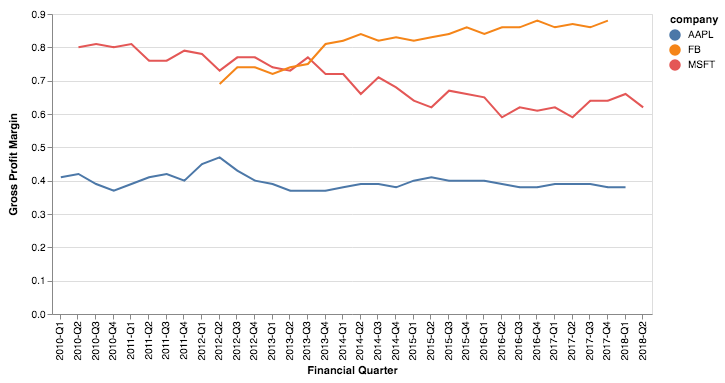

In [73]:
## Source: https://altair-viz.github.io/gallery/multiline_tooltip.html

gpm['margin'] = round(gpm['margin'],2)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['fin_quarter_viz'], empty='none')

gpm_chart = alt.Chart().mark_line().encode(
    x=alt.X('fin_quarter_viz', axis=alt.Axis(title='Financial Quarter')),
    y=alt.Y('margin', axis=alt.Axis(title='Gross Profit Margin')),
    color = 'company'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='fin_quarter_viz',
    opacity=alt.value(0),
).properties(
    selection=nearest
)

# Draw points on the line, and highlight based on selection
points = gpm_chart.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = gpm_chart.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'margin:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='fin_quarter_viz',
).transform_filter(
    nearest.ref()
)

# Put the five layers into a chart and bind the data
alt.layer(gpm_chart, selectors, points, rules, text,
          data=gpm.loc[:,['margin', 'fin_quarter_viz', 'company']], width=600, height=300)